# CiVilium Price Prediction

TechX tarihindeki en uzun zamandır, mistik bir kripto para birimi olan CiVilium (CiV), Akademik Liderler arasında dolaşıyordu. Fiyatı çılgınca dalgalansa da, fiyat değişiminde altta yatan bir kalıp keşfetmeyi umuyoruz.

Görevimiz, Civilium'un gelecekteki fiyat eğilimlerini tahmin eden bir makine öğrenme modeli geliştirmek ve böylece CiVilium'un piyasasını manipüle etme gücüne sahip olmaktır. Tekel kazanan kişi XAcademy'yi yönetecektir.

<img src="https://www.kaggle.com/competitions/30300/images/header">

Unix_Timestamp - Zaman penceresinin başlangıç ​​saati (60 saniyelik pencere), Unix zamanında<br>
Volume_CiVilium - Bu pencerede Birim (Uts) cinsinden işlem gören CiVilium hacmi<br>
Weighted_Price - Hacim Ağırlıklı Ortalama Fiyat, Zibabwe Doları (ZWD) cinsinden

<a href="https://www.kaggle.com/competitions/CiVilium/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train_final.csv")

In [3]:
df.head()

,Unix_Timestamp,Volume_CiVilium,Weighted_Price
0,1325317920,0.455581,1.021950
1,1325346600,48.000000,1.021950
2,1325350740,37.862297,1.022632
3,1325350800,9.000000,1.022900
4,1325391360,1.502000,1.022900


In [4]:
df.shape

(734002, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734002 entries, 0 to 734001
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unix_Timestamp   734002 non-null  int64  
 1   Volume_CiVilium  734002 non-null  float64
 2   Weighted_Price   734002 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 16.8 MB


In [6]:
df.isnull().sum()

Unix_Timestamp     0
Volume_CiVilium    0
Weighted_Price     0
dtype: int64

In [7]:
dosya=pd.DataFrame()

In [8]:
dosya["Unix_Timestamp"]=df["Unix_Timestamp"]

In [9]:
df["Unix_Timestamp"]=pd.to_datetime(df["Unix_Timestamp"], unit='s')

In [10]:
df["date"]=df["Unix_Timestamp"].dt.date

In [11]:
df["time"]=df["Unix_Timestamp"].dt.time

In [12]:
df=df.drop("Unix_Timestamp",axis=1)

In [13]:
df.head()

,Volume_CiVilium,Weighted_Price,date,time
0,0.455581,1.021950,2011-12-31,07:52:00
1,48.000000,1.021950,2011-12-31,15:50:00
2,37.862297,1.022632,2011-12-31,16:59:00
3,9.000000,1.022900,2011-12-31,17:00:00
4,1.502000,1.022900,2012-01-01,04:16:00


In [14]:
df["date"].value_counts()

date
2013-12-07    1439
2014-02-25    1438
2013-12-09    1437
2013-11-14    1436
2013-12-08    1434
              ... 
2012-01-08       2
2012-02-11       2
2012-01-07       1
2012-01-02       1
2012-01-28       1
Name: count, Length: 1087, dtype: int64

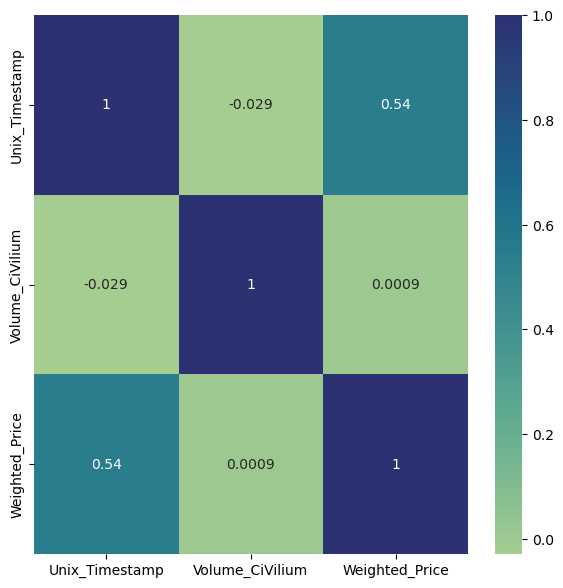

In [62]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

<Axes: >

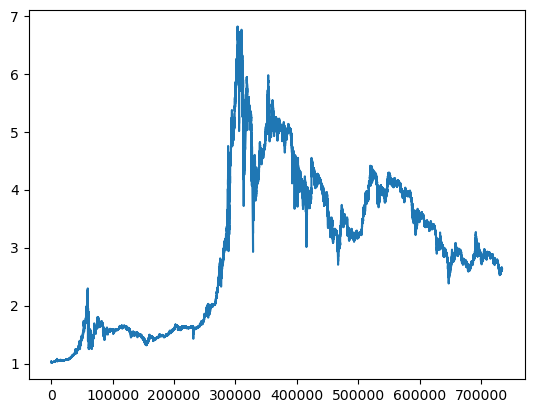

In [16]:
df.Weighted_Price.plot()

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

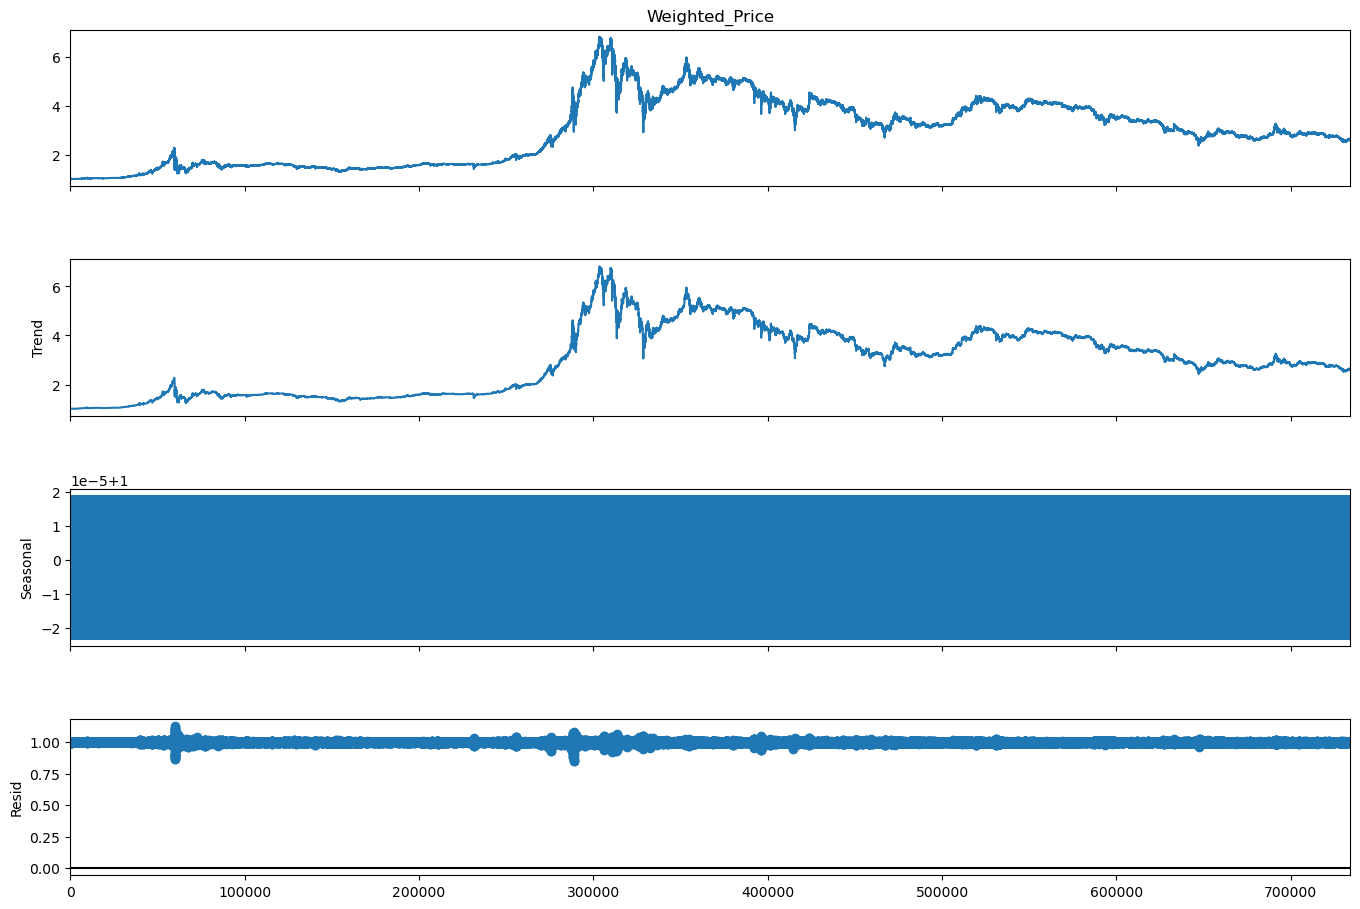

In [48]:
result=seasonal_decompose(df["Weighted_Price"],model="multiplicative",period=30)
fig=result.plot()
fig.set_size_inches(15,10)

In [17]:
df=pd.read_csv("train_final.csv")

In [18]:
x=df.drop("Weighted_Price",axis=1)
y=df["Weighted_Price"]

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
xgb=XGBRegressor()

In [24]:
mod1=xgb.fit(x_train,y_train)

In [25]:
thmn1=xgb.predict(x_test)

In [27]:
r2_score(y_test,thmn1)

0.9954157834701824

In [30]:
mean_squared_error(y_test,thmn1)**.5

0.08895180521893203

In [69]:
import pickle

In [70]:
pickle.dump(mod1,open("CiVilium.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

In [31]:
GBR=GradientBoostingRegressor()

In [32]:
mod2=GBR.fit(x_train,y_train)

In [33]:
thmn2=GBR.predict(x_test)

In [34]:
r2_score(y_test,thmn2)

0.9944731260215368

In [35]:
mean_squared_error(y_test,thmn2)**.5

0.09767017949981513

In [36]:
dt=DecisionTreeRegressor()

In [37]:
mod3=dt.fit(x_train,y_train)

In [38]:
thmn3=dt.predict(x_test)

In [39]:
r2_score(y_test,thmn3)

0.9999619391075918

In [40]:
mean_squared_error(y_test,thmn3)**.5

0.008105161788258158

In [41]:
residuals=y_test-thmn1

<Axes: xlabel='Weighted_Price', ylabel='Count'>

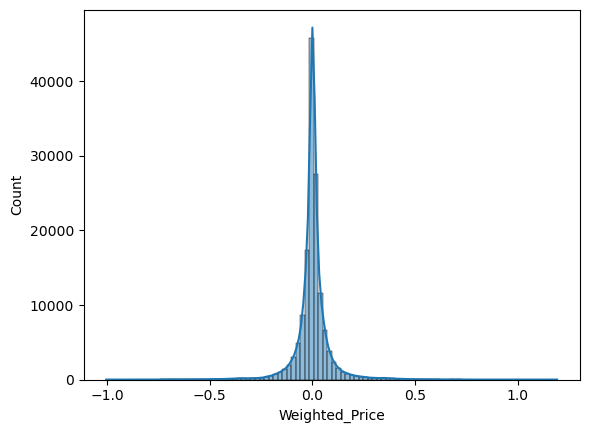

In [42]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='Weighted_Price', ylabel='Density'>

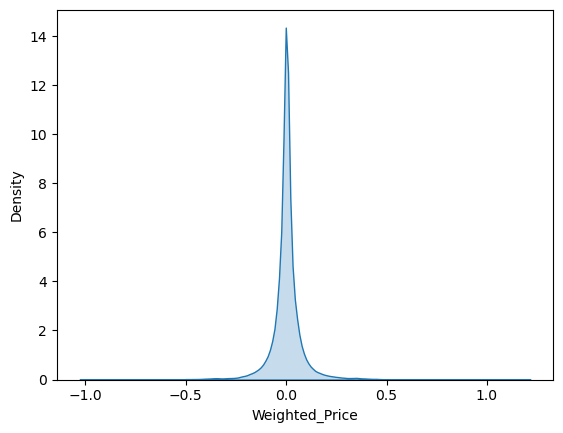

In [43]:
sns.kdeplot(residuals, fill=True)

In [63]:
test=pd.read_csv("test_final.csv")

In [65]:
test["Weighted_Price"]=xgb.predict(test)

In [67]:
test=test.drop("Volume_CiVilium",axis=1)

In [68]:
test.to_csv("tahmin.csv",index=False)

### Deep Learning

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [51]:
x=scale(x)

C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [53]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")   

In [54]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.7215 - val_loss: 0.0391
Epoch 2/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0367 - val_loss: 0.0334
Epoch 3/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0326 - val_loss: 0.0297
Epoch 4/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0294 - val_loss: 0.0262
Epoch 5/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0271 - val_loss: 0.0188
Epoch 6/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0222 - val_loss: 0.0200
Epoch 7/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0200 - val_loss: 0.0168
Epoch 8/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0182 - val_loss: 0.0171
Epoch 9/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0172 - val_loss: 0.0167
Epoch 10/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0169 - val_loss: 0.0144
Epoch 11/500
4588/4588 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0164 - val_loss: 0.0151
Epoch 12/500
4588/

In [55]:
tahmin=model.predict(x_test)

4588/4588 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


In [56]:
r2_score(tahmin,y_test)

0.9973459488937578

In [57]:
mean_squared_error(tahmin,y_test)**.5

0.06755538651200815

In [58]:
loss_f=pd.DataFrame(history.history)

<Axes: >

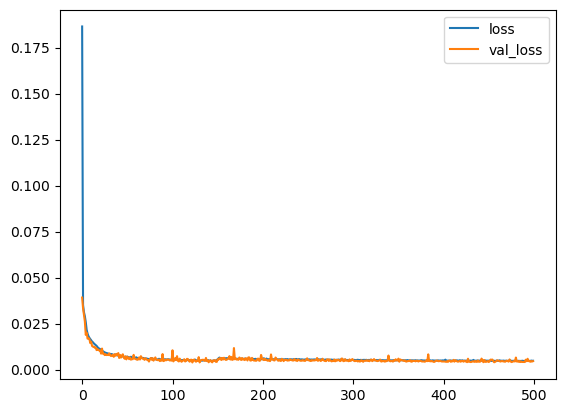

In [59]:
loss_f.plot()

Pu projede CiVilium un zamana baglı fiyat degisikliklerini analiz edip gelecekteki fiyatlarını tahmin eden bir model olusturduk.